In [1]:
#Create references to important directories we will use over and over
import os, sys
current_dir = os.getcwd()
SCRIPTS_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir+'/data'

In [153]:
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd

from keras.models import Sequential # 1 neural network pls = 1 model
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import text, image

from sklearn.cross_validation import train_test_split

from scipy import ndimage, misc

In [154]:
%cd $DATA_HOME_DIR

#Set path to sample/ path if desired
path = DATA_HOME_DIR
train_path=path + '/train/binary/'
valid_path=path + '/valid/binary/'

/home/nathan/olin/spring2017/line-follower/line-follower/src/old_lane_follower_past_project/data


## Import a sample image

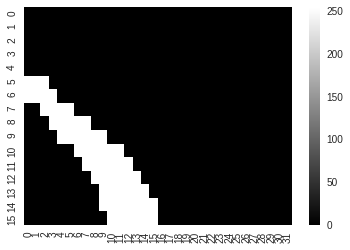

In [155]:
sample_image_path = train_path+'left/'
sample_image_path = sample_image_path + os.listdir(sample_image_path)[0]
sample_image = misc.imread(sample_image_path)

sns.heatmap(sample_image, cmap='gray')

In [156]:
image_shape = sample_image.shape
if len(image_shape) == 2:
    image_shape = image_shape + (1,)
print(image_shape)

(16, 32, 1)


## Constants

In [157]:
batch_size=32

## Import data

In [186]:
gen = image.ImageDataGenerator(rescale=1. / 255)
train_gen = gen.flow_from_directory(train_path, target_size=image_shape[:2],
                color_mode='grayscale',class_mode='categorical', batch_size=batch_size)

validation_gen = gen.flow_from_directory(valid_path, target_size=image_shape[:2],
                color_mode='grayscale',class_mode='categorical', batch_size=batch_size)

Found 938 images belonging to 3 classes.
Found 536 images belonging to 3 classes.


# Make a model

In [187]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(16, 3, 3, input_shape=image_shape, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, 5, 5, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))

# Dense layers
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_56 (Convolution2D) (None, 16, 32, 16)    160         convolution2d_input_21[0][0]     
____________________________________________________________________________________________________
maxpooling2d_35 (MaxPooling2D)   (None, 8, 16, 16)     0           convolution2d_56[0][0]           
____________________________________________________________________________________________________
convolution2d_57 (Convolution2D) (None, 8, 16, 32)     12832       maxpooling2d_35[0][0]            
____________________________________________________________________________________________________
maxpooling2d_36 (MaxPooling2D)   (None, 4, 8, 32)      0           convolution2d_57[0][0]           
___________________________________________________________________________________________

## Compile model

In [188]:
model.compile(optimizer='adam', loss='mean_absolute_error')

## Train model

In [189]:
model.fit_generator(train_gen, 
                    samples_per_epoch=train_gen.nb_sample, nb_epoch=3, 
                    validation_data=validation_gen, nb_val_samples=validation_gen.nb_sample)

Epoch 1/3
938/938 [==============================] - 0s - loss: 0.3311 - val_loss: 0.3267
Epoch 2/3
938/938 [==============================] - 0s - loss: 0.3248 - val_loss: 0.3194
Epoch 3/3
938/938 [==============================] - 0s - loss: 0.3188 - val_loss: 0.3129


(1, 16, 32, 1)
[ 1.  0.  0.]
[  8.77074301e-02   8.88908689e-05  -1.77587499e-05]


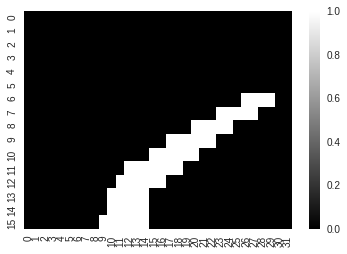

In [195]:
pic, data = next(train_gen)

print(imager.shape)

imager = pic[0:1,:,:]
imager.shape

sns.heatmap(imager.reshape(16,32), cmap='gray')
print(data[0])
print(model.predict(pic)[0])